# Clean and standardize Titanic data

In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

X = titanic[['sex', 'age', 'fare', 'class', 'embark_town', 'alone']]
Y = titanic['survived']

X.head(10)

,sex,age,fare,class,embark_town,alone
0,male,22.0,7.2500,Third,Southampton,False
1,female,38.0,71.2833,First,Cherbourg,False
2,female,26.0,7.9250,Third,Southampton,True
3,female,35.0,53.1000,First,Southampton,False
4,male,35.0,8.0500,Third,Southampton,True
5,male,NaN,8.4583,Third,Queenstown,True
6,male,54.0,51.8625,First,Southampton,True
7,male,2.0,21.0750,Third,Southampton,False
8,female,27.0,11.1333,Third,Southampton,False
9,female,14.0,30.0708,Second,Cherbourg,False


In [2]:
X.isna().sum()

sex              0
age            177
fare             0
class            0
embark_town      2
alone            0
dtype: int64

In [3]:
X[X['embark_town'].isna()]

,sex,age,fare,class,embark_town,alone
61,female,38.0,80.0,First,NaN,True
829,female,62.0,80.0,First,NaN,True


## Age: mean imputation

In [4]:
mean_age = X['age'].mean().round()
mean_age

30.0

In [5]:
X['age'].fillna(mean_age, inplace=True)
X.isna().sum()

sex            0
age            0
fare           0
class          0
embark_town    2
alone          0
dtype: int64

## Missing embark_town: drop

In [6]:
X = X[X['embark_town'].notnull()]
X.shape

(889, 6)

## Outliers

[Cleaning up Data from Outliers](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers)

[Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          889 non-null    object  
 1   age          889 non-null    float64 
 2   fare         889 non-null    float64 
 3   class        889 non-null    category
 4   embark_town  889 non-null    object  
 5   alone        889 non-null    bool    
dtypes: bool(1), category(1), float64(2), object(2)
memory usage: 36.6+ KB


In [8]:
X.describe()

,age,fare
count,889.000000,889.000000
mean,29.713352,32.096681
std,12.969135,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,30.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [9]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
IQR

age      13.0000
fare     23.1042
alone     1.0000
dtype: float64

**skewness value**: extent to which the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values

In [10]:
X['fare'].skew()

4.801440211044194

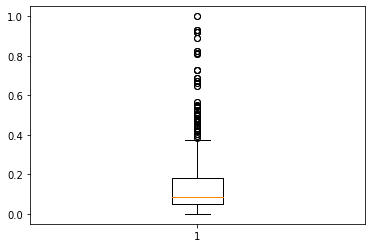

In [27]:
import matplotlib.pyplot as plt
plt.boxplot(X['fare']); plt.show()

In [28]:
# fare outliers
max_fare = X['fare'].mean() + 3 * X['fare'].std(); max_fare

0.6935255129191842

In [29]:
X = X[X['fare'] <= max_fare]
X.shape

(840, 6)

In [30]:
X['fare'].skew()

1.845206815321035

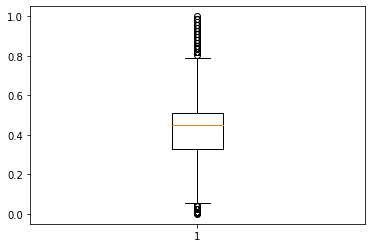

In [31]:
plt.boxplot(X['age']); plt.show()

In [32]:
# age outliers
X['age'].skew()

0.2362288472812189

In [33]:
max_age = X["age"].mean() + (3 * X["age"].std())
X = X[X["age"] <= max_age]
X.shape

(840, 6)

In [34]:
X['alone'].value_counts()

1    515
0    325
Name: alone, dtype: int64

In [35]:
X['class'].value_counts()

1.0    489
0.5    183
0.0    168
Name: class, dtype: int64

In [36]:
X['embark_town'].value_counts()

1.0    616
0.0    148
0.5     76
Name: embark_town, dtype: int64

## Convert to numeric

In [37]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X['sex'] = enc.fit_transform(X['sex'])
X['class'] = enc.fit_transform(X['class'])
X['embark_town'] = enc.fit_transform(X['embark_town'])
X['alone'] = enc.fit_transform(X['alone'])
X.head(10)

,sex,age,fare,class,embark_town,alone
0,1,0.329064,0.043975,2,2,0
1,0,0.573041,0.432369,0,0,0
2,0,0.390058,0.048069,2,2,1
3,0,0.527295,0.322078,0,2,0
4,1,0.527295,0.048827,2,2,1
5,1,0.451052,0.051304,2,1,1
6,1,0.817017,0.314572,0,2,1
7,1,0.024093,0.127831,2,2,0
8,0,0.405306,0.067529,2,2,0
9,0,0.207075,0.182395,1,0,0


## Normalization

In [38]:
type(X['age'])

pandas.core.series.Series

In [39]:
type(X[['age']])

pandas.core.frame.DataFrame

In [40]:
from sklearn.preprocessing import minmax_scale
# watch the [['attr']] !!!
X['age'] = minmax_scale(X[['age']])
X['fare'] = minmax_scale(X[['fare']])
X['class'] = minmax_scale(X[['class']])
X['embark_town'] = minmax_scale(X[['embark_town']])

X.head(10)

,sex,age,fare,class,embark_town,alone
0,1,0.329064,0.064004,1.0,1.0,0
1,0,0.573041,0.629294,0.0,0.0,0
2,0,0.390058,0.069962,1.0,1.0,1
3,0,0.527295,0.468771,0.0,1.0,0
4,1,0.527295,0.071066,1.0,1.0,1
5,1,0.451052,0.074670,1.0,0.5,1
6,1,0.817017,0.457846,0.0,1.0,1
7,1,0.024093,0.186052,1.0,1.0,0
8,0,0.405306,0.098286,1.0,1.0,0
9,0,0.207075,0.265467,0.5,0.0,0
